# Preâmbulo

In [1]:
# Biblioteca básica para o tratamento de dados
import pandas as pd
import numpy as np

In [2]:
# Biblioteca para visualização de dados
from ipywidgets import interact
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Bibliotecas específicas para o aprendizado de máquina
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

# Carregamento dos dados

#### Number of deaths by risk factor

In [4]:
df_number_of_deaths_by_risk_factor = pd.read_csv('../data/Air-pollution/number-of-deaths-by-risk-factor.csv')
df_number_of_deaths_by_risk_factor

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number),...,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261


# Pré-processamento

In [5]:
df_number_of_deaths_by_risk_factor.rename(columns={
    'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)': 'Outdoor air pollution',
    'Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number)': 'High systolic blood pressure',
    'Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number)': 'Diet high in sodium',
    'Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number)': 'Diet low in whole grains',
    'Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)': 'Alcohol use',
    'Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number)': 'Diet low in fruits',
    'Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)': 'Unsafe water source',
    'Deaths - Cause: All causes - Risk: Secondhand smoke - Sex: Both - Age: All Ages (Number)': 'Secondhand smoke',
    'Deaths - Cause: All causes - Risk: Low birth weight - Sex: Both - Age: All Ages (Number)': 'Low birth weight',
    'Deaths - Cause: All causes - Risk: Child wasting - Sex: Both - Age: All Ages (Number)': 'Child wasting',
    'Deaths - Cause: All causes - Risk: Unsafe sex - Sex: Both - Age: All Ages (Number)': 'Unsafe sex',
    'Deaths - Cause: All causes - Risk: Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number)': 'Diet low in nuts and seeds',
    'Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)': 'Household air pollution from solid fuels',
    'Deaths - Cause: All causes - Risk: Diet low in vegetables - Sex: Both - Age: All Ages (Number)': 'Diet low in vegetables',
    'Deaths - Cause: All causes - Risk: Low physical activity - Sex: Both - Age: All Ages (Number)': 'Low physical activity',
    'Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: All Ages (Number)': 'Smoking',
    'Deaths - Cause: All causes - Risk: High fasting plasma glucose - Sex: Both - Age: All Ages (Number)': 'High fasting plasma glucose',
    'Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: All Ages (Number)': 'Air pollution',
    'Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number)': 'High body-mass index',
    'Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number)': 'Unsafe sanitation',
    'Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number)': 'No access to handwashing facility',
    'Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number)': 'Drug use',
    'Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number)': 'Low bone mineral density',
    'Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number)': 'Vitamin A deficiency',
    'Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number)': 'Child stunting',
    'Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)': 'Discontinued breastfeeding',
    'Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)': 'Non-exclusive breastfeeding',
    'Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)': 'Iron deficiency',
}, inplace=True)

In [6]:
df_number_of_deaths_by_risk_factor.drop(columns=[
    'Code',
    'Low physical activity',
    'Non-exclusive breastfeeding',
    'Child wasting',
    'High systolic blood pressure',
    'High fasting plasma glucose',
    'Child stunting',
    'High body-mass index',
    'Secondhand smoke',
    'Diet low in fruits',
    'Diet high in sodium',
    'Drug use',
    'Household air pollution from solid fuels',
    'Low bone mineral density',
    'Smoking',
    'Vitamin A deficiency',
    'Unsafe sanitation',
    'Unsafe water source',
    'Diet low in vegetables',
    'Low birth weight',
    'Diet low in nuts and seeds',
    'Diet low in whole grains',
    'Alcohol use',
    'No access to handwashing facility',
    'Discontinued breastfeeding',
    'Iron deficiency',
    'Unsafe sex',
    'Outdoor air pollution'
], inplace=True)

In [7]:
df_number_of_deaths_by_risk_factor

,Entity,Year,Air pollution
0,Afghanistan,1990,37231
1,Afghanistan,1991,38315
2,Afghanistan,1992,41172
3,Afghanistan,1993,44488
4,Afghanistan,1994,46634
...,...,...,...
6835,Zimbabwe,2015,13246
6836,Zimbabwe,2016,13131
6837,Zimbabwe,2017,12926
6838,Zimbabwe,2018,12745


In [8]:
Brazil = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'Brazil']

In [9]:
Brazil

,Entity,Year,Air pollution
780,Brazil,1990,86653
781,Brazil,1991,82606
782,Brazil,1992,80515
783,Brazil,1993,79970
784,Brazil,1994,77697
785,Brazil,1995,75808
786,Brazil,1996,74643
787,Brazil,1997,72801
788,Brazil,1998,72541
789,Brazil,1999,71693


In [10]:
br = Brazil.set_index(['Year'])

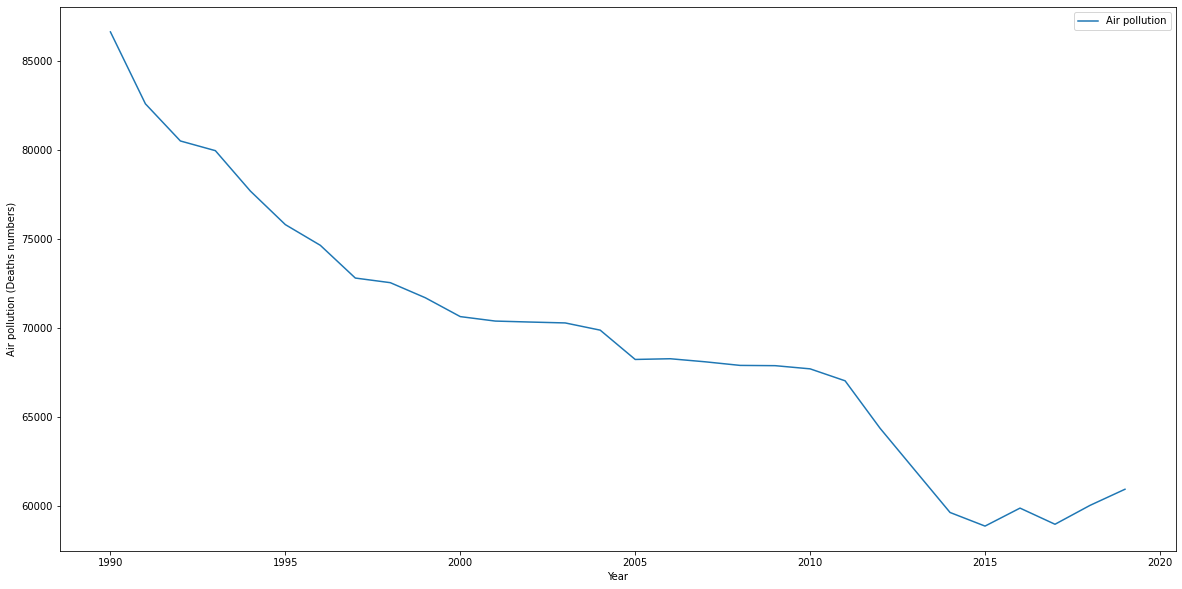

In [11]:
br.plot(ylabel = 'Air pollution (Deaths numbers)', figsize = (20,10))
plt.show()

In [12]:
X_br = Brazil[['Year']]
Y_br = Brazil[['Air pollution']]

In [13]:
X_train_br, X_test_br, Y_train_br, Y_test_br = train_test_split(X_br, Y_br, test_size=0.3, shuffle=False) # separação dos dados de treino e teste

# Processamento

In [14]:
reglinear = SGDRegressor(max_iter=2000, #número máximo de iterações
                         tol=0.0000001, #tolerância
                         eta0=0.01, #taxa de aprendizado
                         learning_rate="constant", #taxa de aprendizado constante
                         verbose=True #mostrar o progresso
                        )

In [15]:
reglinear.fit(X_train_br, Y_train_br)

-- Epoch 1
Norm: 19752733207078.48, NNZs: 1, Bias: 9971367236.632099, T: 21, Avg. loss: 340188089338672326953751115988992.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 127484298151.24, NNZs: 1, Bias: -28632763.367901, T: 42, Avg. loss: 413759868650368569503202207072256.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 20012319030989.00, NNZs: 1, Bias: 9971367236.632099, T: 63, Avg. loss: 374534873308260227842838223650816.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 27582469007.05, NNZs: 1, Bias: -28632763.367901, T: 84, Avg. loss: 416074033514145277398057960341504.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 19647466380308.88, NNZs: 1, Bias: -10028632763.367901, T: 105, Avg. loss: 374245294918923628950667451695104.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 672746014351.07, NNZs: 1, Bias: -28632763.367901, T: 126, Avg. loss: 404467327528086036889962580803584.000000
Total training time: 0.01 seconds.
Convergence after 6 ep

c:\Users\Matheus Vieira\anaconda3\envs\ai4cs\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(learning_rate='constant', max_iter=2000, tol=1e-07, verbose=True)

------------------------------------

# Pós-processamento

In [16]:
Y_rl_previsao = reglinear.predict(X_test_br)
r2_r1  =  r2_score(Y_test_br, Y_rl_previsao)
print("R2_RL:",r2_r1)

R2_RL: -2.720730958848425e+23


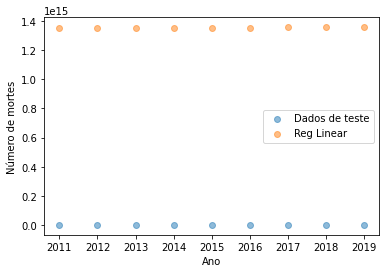

In [17]:
plt.scatter(X_test_br, Y_test_br, alpha=0.5, label= "Dados de teste")
plt.scatter(X_test_br, Y_rl_previsao, alpha=0.5, label= "Reg Linear")
plt.xlabel("Ano")
plt.ylabel("Número de mortes") 
plt.legend()

# Previsão para um novo dado

In [18]:
X_futuro = np.array([[2020]])
X_futuro.T

array([[2020]])

In [19]:
Y_reglinear_prev_futuro = reglinear.predict(X_futuro)

c:\Users\Matheus Vieira\anaconda3\envs\ai4cs\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


In [20]:
X_futuro

array([[2020]])

In [21]:
Y_reglinear_prev_futuro

array([1.35894692e+15])

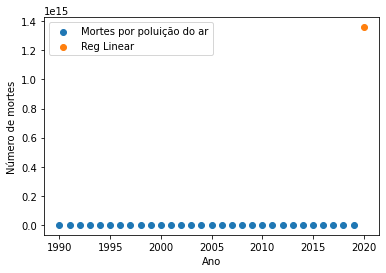

In [22]:
plt.scatter(X_br, Y_br, label="Mortes por poluição do ar")
plt.scatter(X_futuro, Y_reglinear_prev_futuro, label= "Reg Linear")
plt.xlabel("Ano")
plt.ylabel("Número de mortes")
plt.legend()